
| Hardware                |                                            |
|-------------------------|--------------------------------------------|
| Computer Model          |          HP Pavilion                       |
| Operating System        |         Microsoft Windows 10 Home          |
| Processors Name         |         Intel(R) Core(TM) i7-7500U CPU     |
| Processor speed         |         2.70GHz                            |
| RAM                     |         12GB                               |
| Core                    |         4                                  |
| Python version          |         3.64                               |

## Point to Point Communication 

+ In this exercise I will write a parallel program using point-to-point communication routines with MPI. 
+ Suppose a worker with rank 0 has an integer array and it wants to send to all P − 1 workers in COMM WORLD, lets call this routine sendAll.

### Short description of a naive way: NsendAll

+ A naive way to send this array is using a for loop at worker 0 and sequentially send it to all other processes i.e. it will take P − 1 steps. 

Hint: Make sure all the workers exit the sendAll routine at the same time i.e its useful to use MPI Barrier at the end of this function.

### Short description of an efficient way: EsendAll

+ Another possible ways is to use a recursive doubling algorithm, which will require log(P) steps. 
+ Suppose you have P workers, where P ≥ 2d i.e. if P = 33 than d = 5 and rank is the current worker ID. Lets say the root worker has rank 0. The root worker sends to worker with Rank 1 and worker with Rank 2 only. 
+ All other workers first receive a message from recvProc, i.e.

    $recvP roc = int((rank − 1)/2)$


+ and sends to two more processes
    
    $destA = 2 × rank + 1 and destB = 2 × rank + 2$
    
    
+ But before sending, make sure destA and destB exist. 
+ To make sure every process has finished put a MPI.Barrier() just before returning from sendAll routine.



## NsendAll

 ### Strategy
1. Initialize the size of the array
2. Check if the number of process/worker is greater than one 
3. If the number of process is one, print "The number of Process is 1, Process 1 have no other process to send data to". Because there must be more than one process before process 1 can send to other processes 
4. If the number of Process is more than 1 
5. Then Process 1 send the whole array to all other process
6. Other processes receive from process 1

##### a root worker will send the data to all the workers sequentially and the workers will recieve it.

In [ ]:
"""
Created on Mon Apr 23 09:36:26 2018
@author: John Robert
"""

from mpi4py import MPI
import numpy as np

comm = MPI.COMM_WORLD
size = comm.Get_size() #Get number of processes
rank = comm.Get_rank()
processorName = MPI.Get_processor_name()
root = 0

#To store the time the process start
t_start = 0

#Initailize the size of the array
N = 100

# the number of process must be greater than 1 
if size == 1:
    
    print("The number of Process is 1, Process 1 have no other process to send data to")
#When the number of processes is greater than 1   
if size > 1:   
    t_start = MPI.Wtime()
    #if is the Process 1 with rank 0 - the root process
    if rank == 0:
        
        #Generating array with random numbers
        arrayA = np.random.randint(1,100, size=(1,N))
        print("Array A: \n {} \n".format(arrayA))
        
        #Send Array A to all process P-1
        for i in range(1,size):        
        
            #Sending array A to all process 
            comm.send(arrayA,dest=i)
         
        comm.Barrier()
        
    if rank != 0:
        #receive array A from root process
        recDataA = comm.recv(source= 0)
        #print("Data was received from the root process")
        comm.Barrier()
if rank == 0:
    t_diff = MPI.Wtime() - t_start
    print("Total time sent {} \n".format(t_diff))     

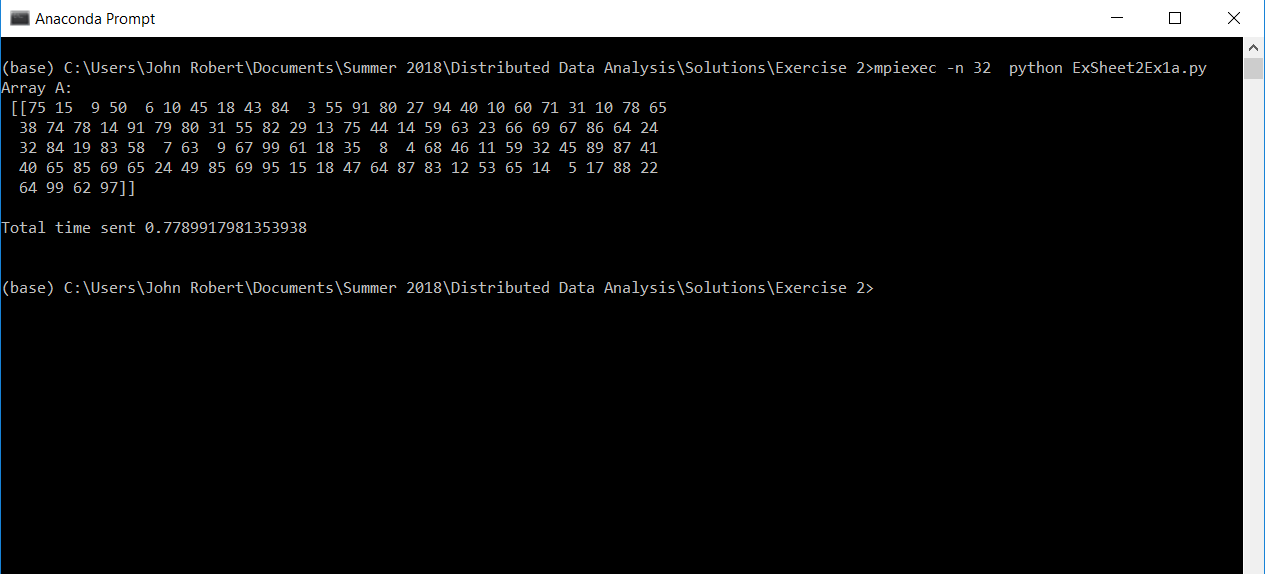

| N                          | Number of workers(number of process)       |Time taken for computation            |
|----------------------------|--------------------------------------------|--------------------------------------|
| 100        =  $10^2$       |          2                                 |   0.0007                             |
| 100        =  $10^2$       |          4                                 |   0.0012                             |
| 100        =  $10^2$       |          8                                 |   0.0016                             |
| 100        =  $10^2$       |         16                                 |   0.0301                             |
| 100        =  $10^2$       |         32                                 |   0.2167                             |
|----------------------------|--------------------------------------------|--------------------------------------|
| 10000      =  $10^4$       |          2                                 |   0.0014                             |
| 10000      =  $10^4$       |          4                                 |   0.0024                             |
| 10000      =  $10^4$       |          8                                 |   0.0036                             |
| 10000      =  $10^4$       |         16                                 |   0.0419                             |
| 10000      =  $10^4$       |         32                                 |   0.1702                             |
|----------------------------|--------------------------------------------|--------------------------------------|
| 1000000    =  $10^6$       |          2                                 |   0.0192                             |
| 1000000    =  $10^6$       |          4                                 |   0.0422                             |
| 1000000    =  $10^6$       |          8                                 |   0.0800                             |
| 1000000    =  $10^6$       |         16                                 |   0.2776                             |
| 1000000    =  $10^6$       |         32                                 |   0.5196                             |
|----------------------------|--------------------------------------------|--------------------------------------|


## Ploting the results of NsendAll

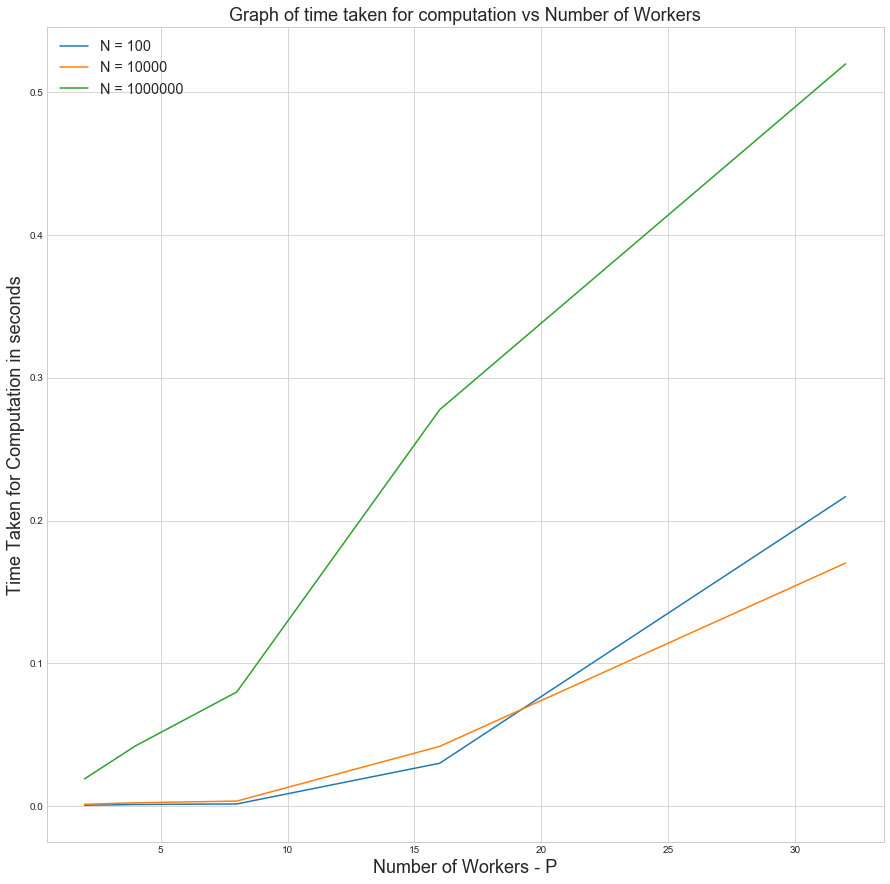

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

#intializing the size of the plot
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,15)
sb.set_style ('whitegrid')

#Number of workers 
noWorkers  = [2,4,8,16,32]

#Time taken for each value of N(Size of the array)
timeTakenN2 = [0.0007, 0.0012, 0.0016, 0.0301,0.2167]
timeTakenN4 = [0.0014, 0.0024, 0.0036, 0.0419,0.1702]
timeTakenN6 = [0.0192, 0.0422, 0.0800, 0.2776,0.5196]
 
#Ploting the line graph    
plt.plot(noWorkers,timeTakenN2, label = "N = 100" )
plt.plot(noWorkers,timeTakenN4, label = "N = 10000" )
plt.plot(noWorkers,timeTakenN6, label = "N = 1000000" )

#Labeling the graph
plt.xlabel("Number of Workers - P", fontsize=18)
plt.ylabel("Time Taken for Computation in seconds", fontsize=18)
plt.yticks()
plt.title('Graph of time taken for computation vs Number of Workers', fontsize=18)
plt.legend(fontsize='x-large')

## Comment
### Predictions from the graphs and tables
1. From the table we noticed that as the number of workers increase, the time taken for computation also increase. This could be because I am multitasking instead of multiprocessing because my computer is not a distributed environment.
2. From the graph, I noticed that as the size of vector N  increase, the time taken for compututation also increase.This could be because the worker have more work to do when the size of N increase 

# EsendAll

### Strategy

1. Initialize the size of the array
2. Create a function to calculate the Dest of the data sent
3. If Rank == 0 send data to 1 and 2, before sending data, confrim if 1 and 2 exist
4. Don't send data to any destination that don't exist
5. Rank zero need to send first because it is the only rank that send and dont receive 
6. When rank is not equal to 0 
7. Receive data from int((rank-1)/2)
8. Then send data to (2 *rank) + 1 and (2 *rank) + 2,before sending data, confrim if (2 *rank) + 1 and (2 *rank) + 1 exist 

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Tue Apr 24 10:10:30 2018
@author: John Robert
"""

from mpi4py import MPI
import numpy as np

comm = MPI.COMM_WORLD
size = comm.Get_size()
rank = comm.Get_rank()
processorName = MPI.Get_processor_name()
root = 0

#Initailize the size of the array
N = 100

#Generating array with random numbers
arrayA = np.random.randint(1,100, size=(1,N))
print("Array A: \n {} \n".format(arrayA))

#Calculating the destination rank for each process
def destA(rank):
    return  (2 *rank) + 1

t_start = 0
#Since only rank 0 send data without receiving data 
if rank == 0:
    t_start = MPI.Wtime()
    #Checking if the rank to receive the data exist before sending it 
    if destA(rank) < size:
        comm.send(arrayA,dest=1) 
        print("Sending to rank: {} \n".format(destA(rank)))
    if  (destA(rank) + 1) < size :
        comm.send(arrayA,dest=2) 
        print("Sending to rank: {} \n".format(destA(rank) + 1))
    comm.barrier()
   
if rank != 0:
    
    #Calculate the rank to receive the data
    recvProc = int((rank-1)/2)
    
    #Receiving the data from the sender 
    recvArrayA= comm.recv(source = recvProc)
    print("Receiving from rank: {} \n".format(recvProc))
     #Checking if the rank to receive the data exist before sending it  
    if destA(rank) < size:
        comm.send(arrayA,dest=destA(rank)) 
        print("Sending to rank: {} \n".format(destA(rank)))
    if (destA(rank) + 1) < size:
        comm.send(arrayA,dest=(destA(rank) +1))
        print("Sending to rank: {} \n".format(destA(rank) + 1))
    comm.barrier()
if rank == 0:
    t_diff = MPI.Wtime() - t_start
    print("Total time sent {} \n".format(t_diff))

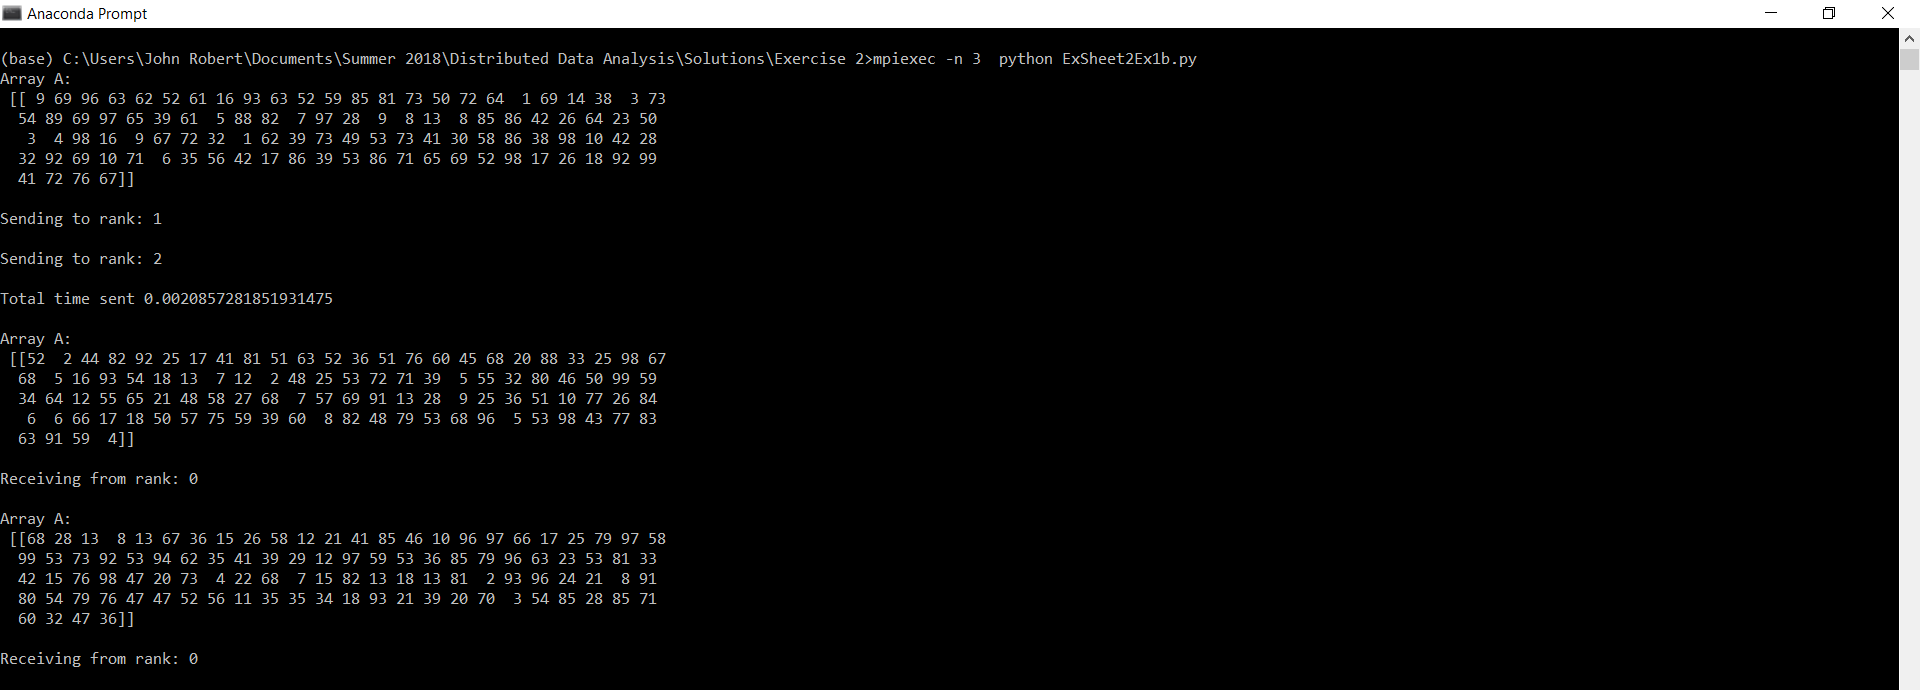

| N                          | Number of workers(number of process)       |Time taken for computation            |
|----------------------------|--------------------------------------------|--------------------------------------|
| 100        =  $10^2$         |          2                                 |   0.0009                             |
| 100        =  $10^2$         |          4                                 |   0.0015                             |
| 100        =  $10^2$         |          8                                 |   0.1399                             |
| 100        =  $10^2$         |         16                                 |   0.1766                             |
| 100        =  $10^2$         |         32                                 |   0.3829                             |
|----------------------------|--------------------------------------------|--------------------------------------|
| 10000      =  $10^4$         |          2                                 |   0.0019                             |
| 10000      =  $10^4$         |          4                                 |   0.0119                             |
| 10000      =  $10^4$         |          8                                 |   0.1287                             |
| 10000      =  $10^4$         |         16                                 |   0.1951                             |
| 10000      =  $10^4$         |         32                                 |   0.9275                             |
|----------------------------|--------------------------------------------|--------------------------------------|
| 1000000    =  $10^6$         |          2                                 |   0.0096                             |
| 1000000    =  $10^6$         |          4                                 |   0.0209                             |
| 1000000    =  $10^6$         |          8                                 |   0.1144                             |
| 1000000    =  $10^6$         |         16                                 |   0.4405                             |
| 1000000    =  $10^6$         |         32                                 |   0.7968                             |
|----------------------------|--------------------------------------------|--------------------------------------|


## Ploting the results of EsendAll

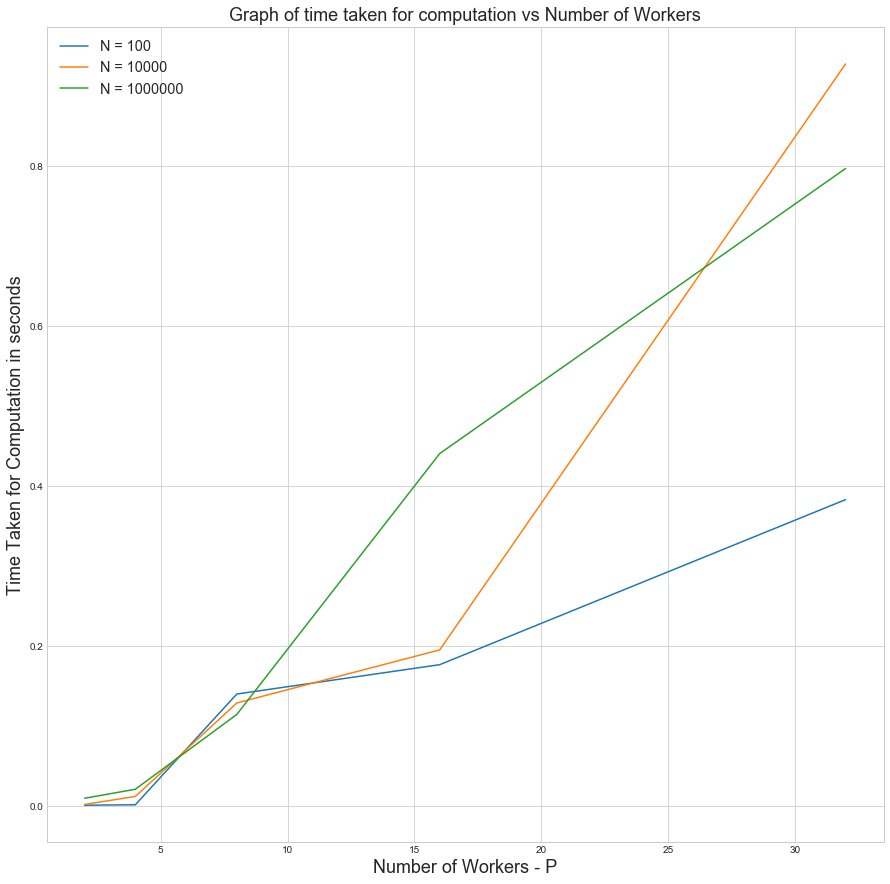

In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (15,15)
sb.set_style ('whitegrid')

noWorkers  = [2,4,8,16,32]

timeTakenN2 = [0.0009, 0.0015, 0.1399, 0.1766,0.3829]
timeTakenN4 = [0.0019, 0.0119, 0.1287, 0.1951,0.9275]
timeTakenN6 = [0.0096, 0.0209, 0.1144, 0.4405,0.7968]
 
plt.plot(noWorkers,timeTakenN2, label = "N = 100" )
plt.plot(noWorkers,timeTakenN4, label = "N = 10000" )
plt.plot(noWorkers,timeTakenN6, label = "N = 1000000" )


plt.xlabel("Number of Workers - P", fontsize=18)
plt.ylabel("Time Taken for Computation in seconds", fontsize=18)
plt.yticks()
plt.title('Graph of time taken for computation vs Number of Workers', fontsize=18)
plt.legend(fontsize='x-large')

## Comment
### Predictions from the graphs and tables
1. From the table we noticed that as the number of workers increase, the time taken for computation also increase. This could be because I am multitasking instead of multiprocessing because my computer is not a distributed environment.
2. From the graph, I noticed that as the size of vector N  increase, the time taken for compututation also increase.This could be because the worker have more work to do when the size of N increase  

# Comparing the performance of NSendAll and ESendAll
## Comment

From the table we notice that ar size N = 100 for NsendAll the time is lower that the time at size N= 100 for ESendall, so generally it means NSendAll is slower than ESendAll because EsendAll workers need to compute the worker they are sending data to. NsendAll send to all other workers without doing any calculation. Also in ESendAll a worker need to be use the worker he is sending to exist 

# Collective Communication

+ Images generally have RGB or gray scale values. 
+ Finding histogram is just calculating the frequency of occurrence of each gray scale or RGD value.

## GreyScale

1. Read the image from a file
2. Covert the image to matrix
3. Divide the matrix among the workers 
4. Scatter the matrix slice to all the workers
5. Each worker turn the matrix to an array
6. Calculate the frequency of number
6. Combine the each workers array together 
7. Find the frequency of number 0 - 255 in the array 
8. Plot the histogram of the frequeny 

In [ ]:
"""
Created on Wed Apr 25 05:19:18 2018
@author: John Robert
"""

from mpi4py import MPI
import numpy as np
from decimal import Decimal, ROUND_HALF_UP
import cv2

from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sb

comm = MPI.COMM_WORLD 
rank=comm.Get_rank()
size = comm.Get_size()
root = 0
#To read the image into a matrix
#Load a greyscale image  
img = cv2.imread('images.jpg',0) #load a color image in grayscale

# img = cv2.imread('images.jpg',0)   

#Print the matrix of the image
print(img)


#Get the dimension of the matrix 
matrixGreySize = img.shape
print("The size of matrix for greyscale image : {} \n".format(matrixGreySize))
NoRow = img.shape[0]
print("The number of rows in the matrix is : {} \n".format(NoRow))



#To find the frequencey of a number in an array 
def frequency(listofNumber):
    freqencyResult = {}
    for i in listofNumber:
            if i in freqencyResult:
                    freqencyResult[i] = freqencyResult.get(i)+1
            else:
                    freqencyResult[i] =1
    return freqencyResult


dataToScatterGrey = []

dataToComputeGrey = []

ProcessedFlattenData = []

totalFrequencyTableGrey={}
if rank == 0:
    
    # No. of rows each process will work on
    dataSize4Worker = int(Decimal(NoRow / (size)).quantize(Decimal('1.'), rounding= ROUND_HALF_UP))
    print("Size of data for each process is {} \n".format(dataSize4Worker))
     
    
    #Dividing  the initial matrix among the workers and sending it to them for computation
    for i in range(0,size):
        
        startSlice = dataSize4Worker * i
        
        #Checking if it is the last worker
        #Give remaining data to the last worker, in case all slice don't have equal size
        if i == size:
            endSlice = NoRow
        else:
            endSlice = startSlice + dataSize4Worker 
        
        #Arrage the slice of data in an array so it will be easy to scatter it 
        dataToComputeGrey.append(img[startSlice:endSlice, :])

#send sliced data to other workers for computation 
print("DataToCompute for GreyScale: \n {} \n".format(dataToComputeGrey))
dataToScatterGrey = comm.scatter(dataToComputeGrey, root = 0)        

#Convert the slice of data into a array of one dimension array
flattenDataGrey = np.ravel(dataToScatterGrey)
print("flattenData for Rank {}: \n {} \n".format(rank, flattenDataGrey))
print (flattenDataGrey.shape)

#Get the frequency of 0 - 255 in the data sent 
processfrequencyTable = frequency(flattenDataGrey)
print("Frequency distribution for rank process {} : \n {} \n".format(rank,processfrequencyTable))

#Combine the one dimension arrray generated by each process
ProcessedFlattenData.append(flattenDataGrey)

for i in processfrequencyTable:
        if i in totalFrequencyTableGrey:
            totalFrequencyTableGrey[i] = totalFrequencyTableGrey[i] + processfrequencyTable[i]
        else:
            totalFrequencyTableGrey[i] = processfrequencyTable[i]

print("Total Frequency distribution : \n {} \n".format(totalFrequencyTableGrey))



if rank == 0:
    
    #To display an image in a window
    cv2.imshow('image',img)
    
    #To display the image for a particular number of seconds
    #for a keyboard event 
    cv2.waitKey(0)
    #TO close the windows of the images that were open
    cv2.destroyAllWindows()
    #ProcessedFlattenData = np.ravel(ProcessedFlattenData)
    
    plt.hist(ProcessedFlattenData, 256, [0,256])
    plt.rcParams['figure.figsize'] = (15,15)
    sb.set_style ('whitegrid')
    plt.xlabel('Values of 0 - 255')
    plt.ylabel('Frequency of occurrence')
    plt.title('Histogram for gray scale picture')
    #plt.legend(fontsize='x-large')
    plt.show()
    
    
    #for key in sorted(totalFrequencyTable.iterkeys()):
        #print ("%s:   %s" % (key, totalFrequencyTable[key]))
    totalFrequencyTableGrey = dict(sorted(totalFrequencyTableGrey.items()))
    print('value     Frequency')
    for value, frequency in totalFrequencyTableGrey.items():
        print('{}       {}'.format(value, frequency))



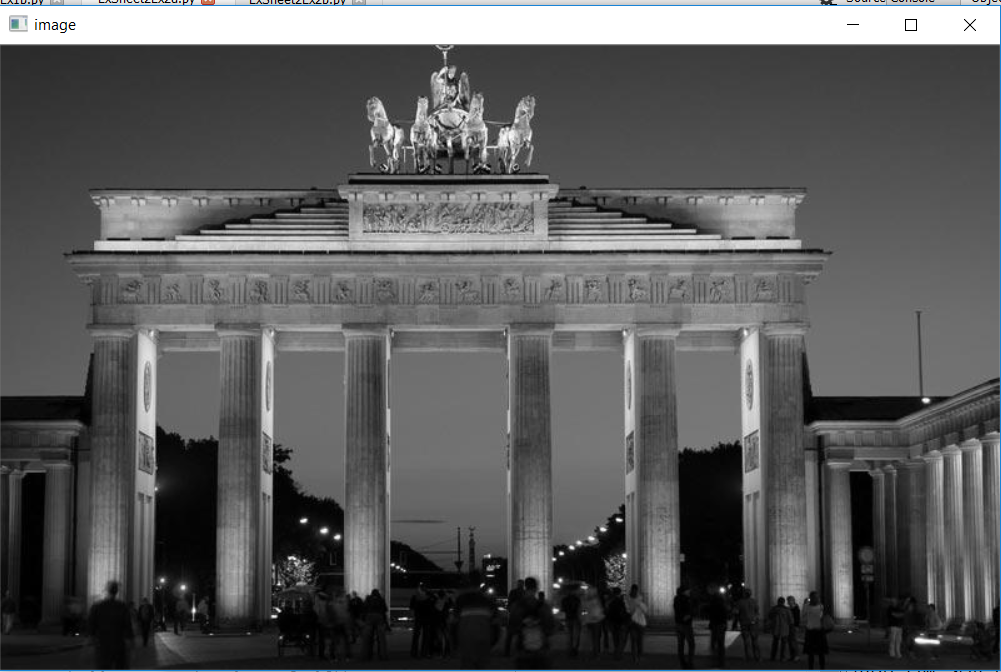

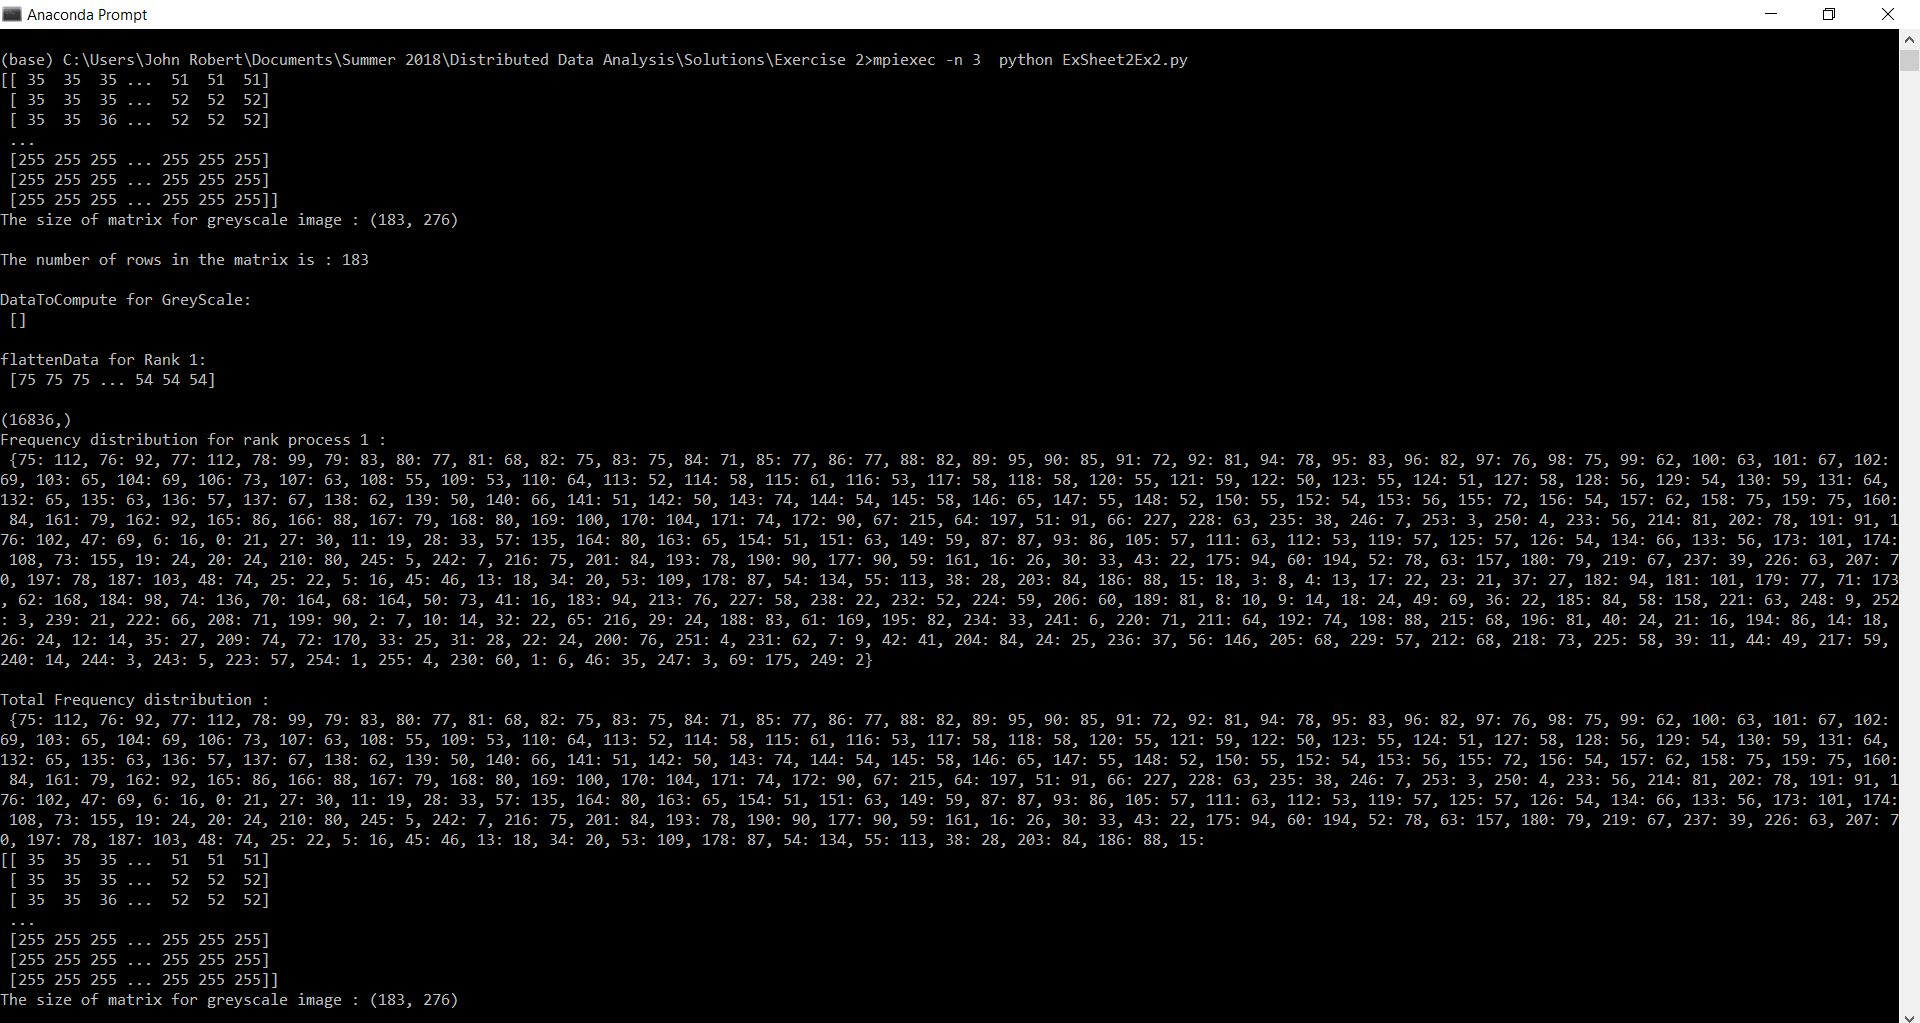

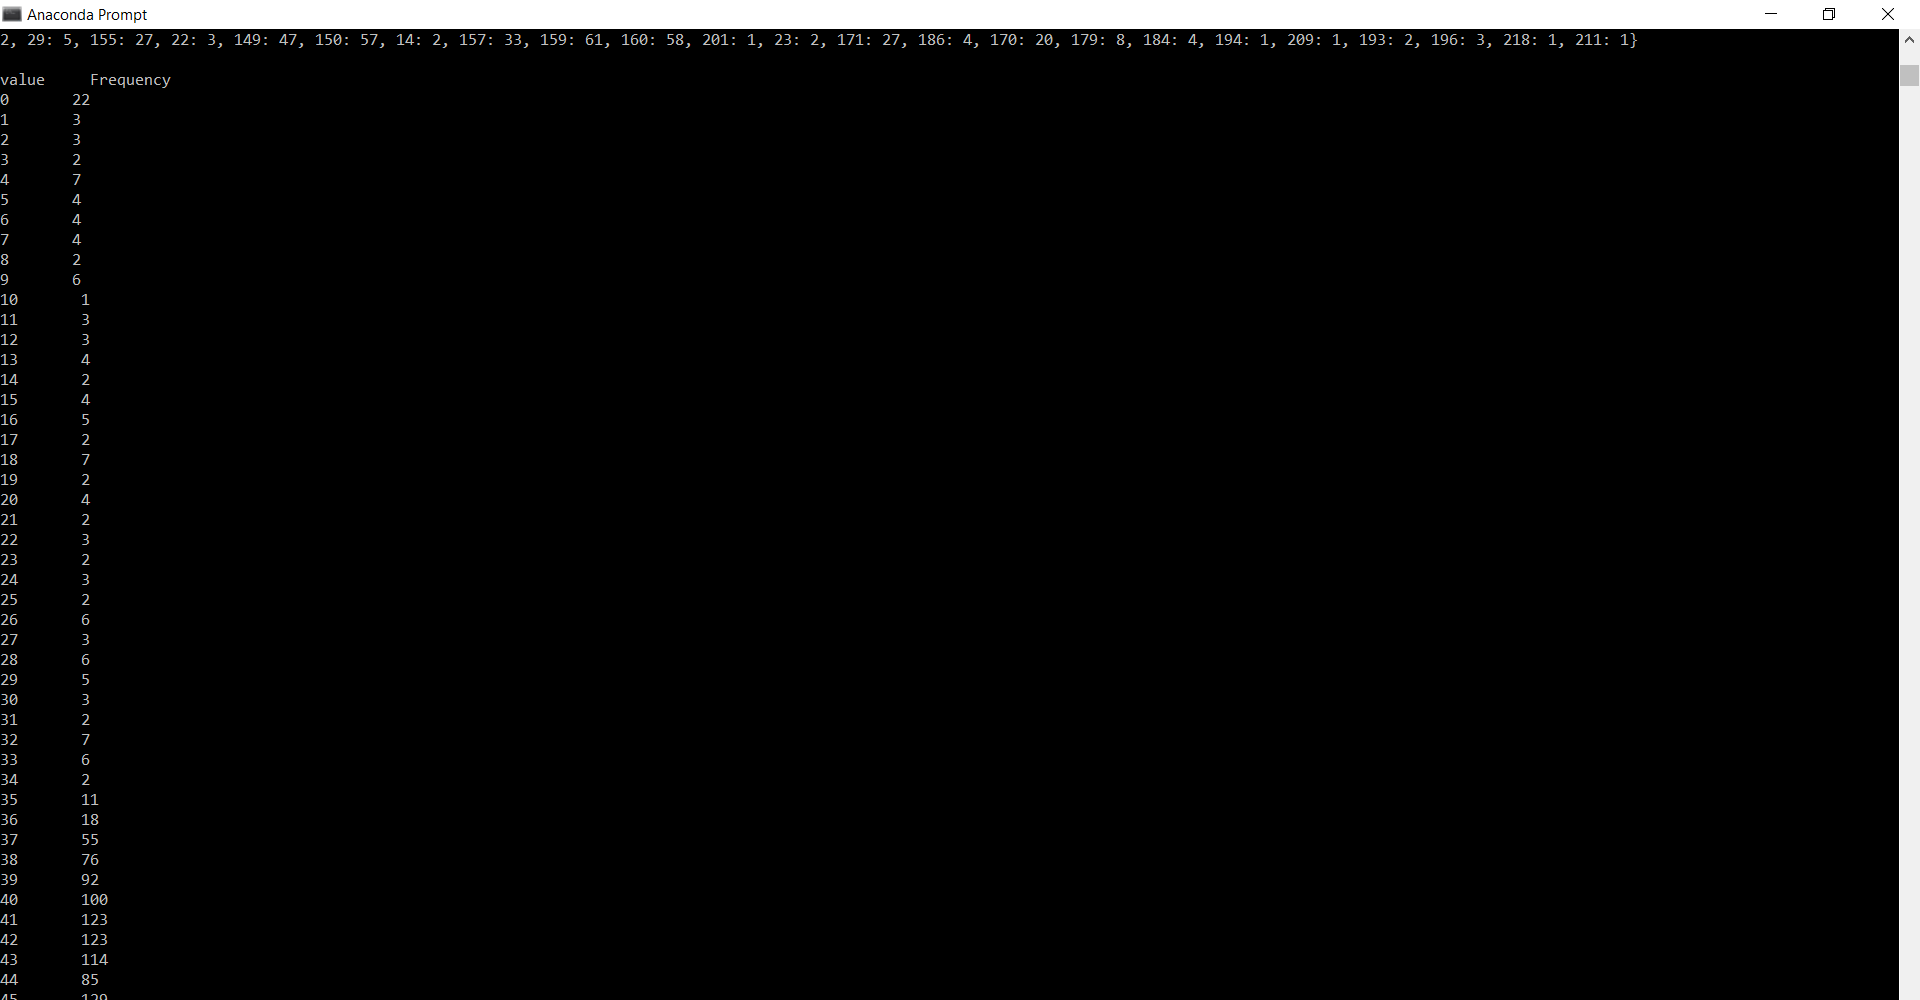


## RGB

1. Read the image from a file
2. Covert the image to matrix
3. Get the number of rows of the Matrix of the image 
4. Divide the Matrix of the image by the number of workers
5. Get each slice of the Matrix meant for each worker
6. Store each Slice in as an item in an array, so that it will be easy to scatter each slice to different workers
7. Send each item in the array(slice of matrix) to different workers 
8. Each worker covert the 3D array to a 2 dimentional array in which each role contain the R G B values of the image
9. Get all the first value in the 2D array which represent the values of R
10. Get all the second value in the 2D array which represent the values of G
11. Get all the third value in the 2D array which represent the values of B
12. Each worker send back his value for R , G and B 
13. Combine each value of R , G and B into 3 different array in which all R is in array 1, all G is in array 2 and all B is in array 3.
13. Find the frequency of 0 - 255 in each array 
14. Draw the histogram for R , G and B 
15. Draw an histogram to combine R,G and B
16. Draw a line graph to combine R,G and B
17

In [ ]:
"""
Created on Wed Apr 25 05:19:18 2018
@author: John Robert
"""

from mpi4py import MPI
import numpy as np
from decimal import Decimal, ROUND_HALF_UP
import cv2

from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sb

comm = MPI.COMM_WORLD 
rank=comm.Get_rank()
size = comm.Get_size()
root = 0
#To read the image into a matrix
#Load a Color image  
imgColor = cv2.imread('images.jpg',-1)

# img = cv2.imread('images.jpg',0)   load a color image in grayscale

#Print the matrix of the image
print(imgColor)


#Get the dimension of the matrix 
matrixColorSize = imgColor.shape
print("The size of matrix for Color image : {} \n".format(matrixColorSize))
NoRowColor = imgColor.shape[0]
print("The number of rows in the matrix is : {} \n".format(NoRowColor))


#To find the frequencey of a number in an array 
def frequency(listofNumber):
    freqencyResult = {}
    for i in listofNumber:
        if i in freqencyResult:
                freqencyResult[i] = freqencyResult.get(i)+1
        else:
                freqencyResult[i] =1
    return freqencyResult

dataToComputeColor = []

dataToScatterColor = []

TotalRdata = []
TotalGdata = []
TotalBdata = []

totalFrequencyTable ={}
ProcessedFlattenData = []
if rank == 0:
    
    # No. of rows each process will work on
    dataSize4Worker = int(Decimal(NoRowColor / (size)).quantize(Decimal('1.'), rounding= ROUND_HALF_UP))
    print("Size of data for each process is {} \n".format(dataSize4Worker))
     
    
    #Dividing  the initial matrix among the workers and sending it to them for computation
    for i in range(0,size):
        
        startSlice = dataSize4Worker * i
        
        #Checking if it is the last worker
        #Give remaining data to the last worker, in case all slice don't have equal size
        if i == size:
            endSlice = NoRowColor
        else:
            endSlice = startSlice + dataSize4Worker  
        dataToComputeColor.append(imgColor[startSlice:endSlice, :,:])
        
#send sliced data to other workers for computation 
print("DataToCompute of RGB image: \n {} \n".format(dataToComputeColor))
dataToScatterColor = comm.scatter(dataToComputeColor, root = 0)        

#Convert the matrix of the picture to 2 dimension 
#So we can have R G B on each row 
RGBdataToScatterColor = dataToScatterColor.reshape(-1, dataToScatterColor.shape[-1])
MatrixRGBdataToScatterColor = RGBdataToScatterColor.shape
print("The size of matrix for Color image in RGB : {} \n".format(MatrixRGBdataToScatterColor))

#Red values for each pixel in the image 
Rvalue4Data = RGBdataToScatterColor[:,0]
print("Rvalue4Data Red for Rank {}: \n {} \n".format(rank, Rvalue4Data))
#Red values for each pixel in the image 
Gvalue4Data = RGBdataToScatterColor[:,1]
print("Gvalue4Data Green for Rank {}: \n {} \n".format(rank, Gvalue4Data))
#Red values for each pixel in the image 
Bvalue4Data = RGBdataToScatterColor[:,2]
print("Bvalue4Data Blue for Rank {}: \n {} \n".format(rank, Bvalue4Data))

#Combine the R values in the data of each process 
TotalRdata.append(Rvalue4Data)
TotalRdata = np.ravel(TotalRdata)
print("The size of matrix for Color image in R : {} \n".format(len(TotalRdata)))
#Combine the G values in the data of each process 
TotalGdata.append(Gvalue4Data)
TotalGdata = np.ravel(TotalGdata)
print("The size of matrix for Color image in G : {} \n".format(len(TotalGdata)))
#Combine the B values in the data of each process 
TotalBdata.append(Bvalue4Data)
TotalBdata = np.ravel(TotalBdata)
print("The size of matrix for Color image in B : {} \n".format(len(TotalBdata)))



cv2.imshow('image',imgColor)
#To display the image for a particular number of seconds
#for a keyboard event 
cv2.waitKey(0)
#TO close the windows of the images that were open
cv2.destroyAllWindows()

if rank == 0:
    
    #Process frequency for B
    processfrequencyTableB = frequency(TotalBdata)
    #Process frequency for G
    processfrequencyTableG = frequency(TotalGdata)
    #Process frequency for R
    processfrequencyTableR = frequency(TotalRdata)
    
    # Draw the graph for RGB
#    x=[]
#    for i in range(256):
#        x.append(i)
#    plt.plot(x,TotalRdata)
#    plt.plot(x,TotalGdata)
#    plt.plot(x,TotalBdata)
    
    plt.rcParams['figure.figsize'] = (15,15)
    sb.set_style ('whitegrid')

    # Draw the histogram for R 
    plt.hist(TotalRdata,256,[0,256])
    plt.title('Histogram for Colored picture for R',fontsize=18)
    plt.xlabel('Values of 0 - 255', fontsize=18)
    plt.ylabel('Frequency of occurrence of R', fontsize=18)
    plt.legend()
    plt.show()
    
     # Draw the histogram for G 
    plt.hist(TotalGdata,256,[0,256])
    plt.title('Histogram for Colored picture for G',fontsize=18)
    plt.xlabel('Values of 0 - 255', fontsize=18)
    plt.ylabel('Frequency of occurrence of G', fontsize=18)
    plt.legend()
    plt.show()
    
    # Draw the histogram for B 
    plt.hist(TotalBdata,256,[0,256])
    plt.title('Histogram for Colored picture for B',fontsize=18)
    plt.xlabel('Values of 0 - 255', fontsize=18)
    plt.ylabel('Frequency of occurrence of B', fontsize=18)
    plt.legend()
    plt.show()
    
    
    #Arrange the frequency distribution of R in asending other
    processfrequencyTableR = dict(sorted(processfrequencyTableR.items()))
    print('The frequency distribution of R')
    print('value  Frequency')
    for value, frequency in processfrequencyTableR.items():
        print('{}   {}'.format(value, frequency))
        
    #Arrange the frequency distribution of G in asending other
    processfrequencyTableG = dict(sorted(processfrequencyTableG.items()))
    print('The frequency distribution of G')
    print('value  Frequency')
    for value, frequency in processfrequencyTableG.items():
        print('{}   {}'.format(value, frequency))
        
    #Arrange the frequency distribution of B in asending other
    processfrequencyTableB = dict(sorted(processfrequencyTableB.items()))
    print('The frequency distribution of B')
    print('value  Frequency')
    for value, frequency in processfrequencyTableB.items():
        print('{}   {}'.format(value, frequency))


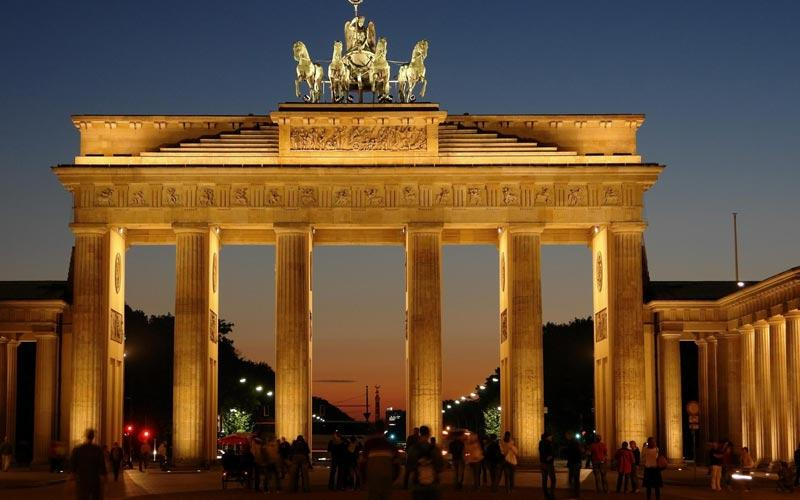

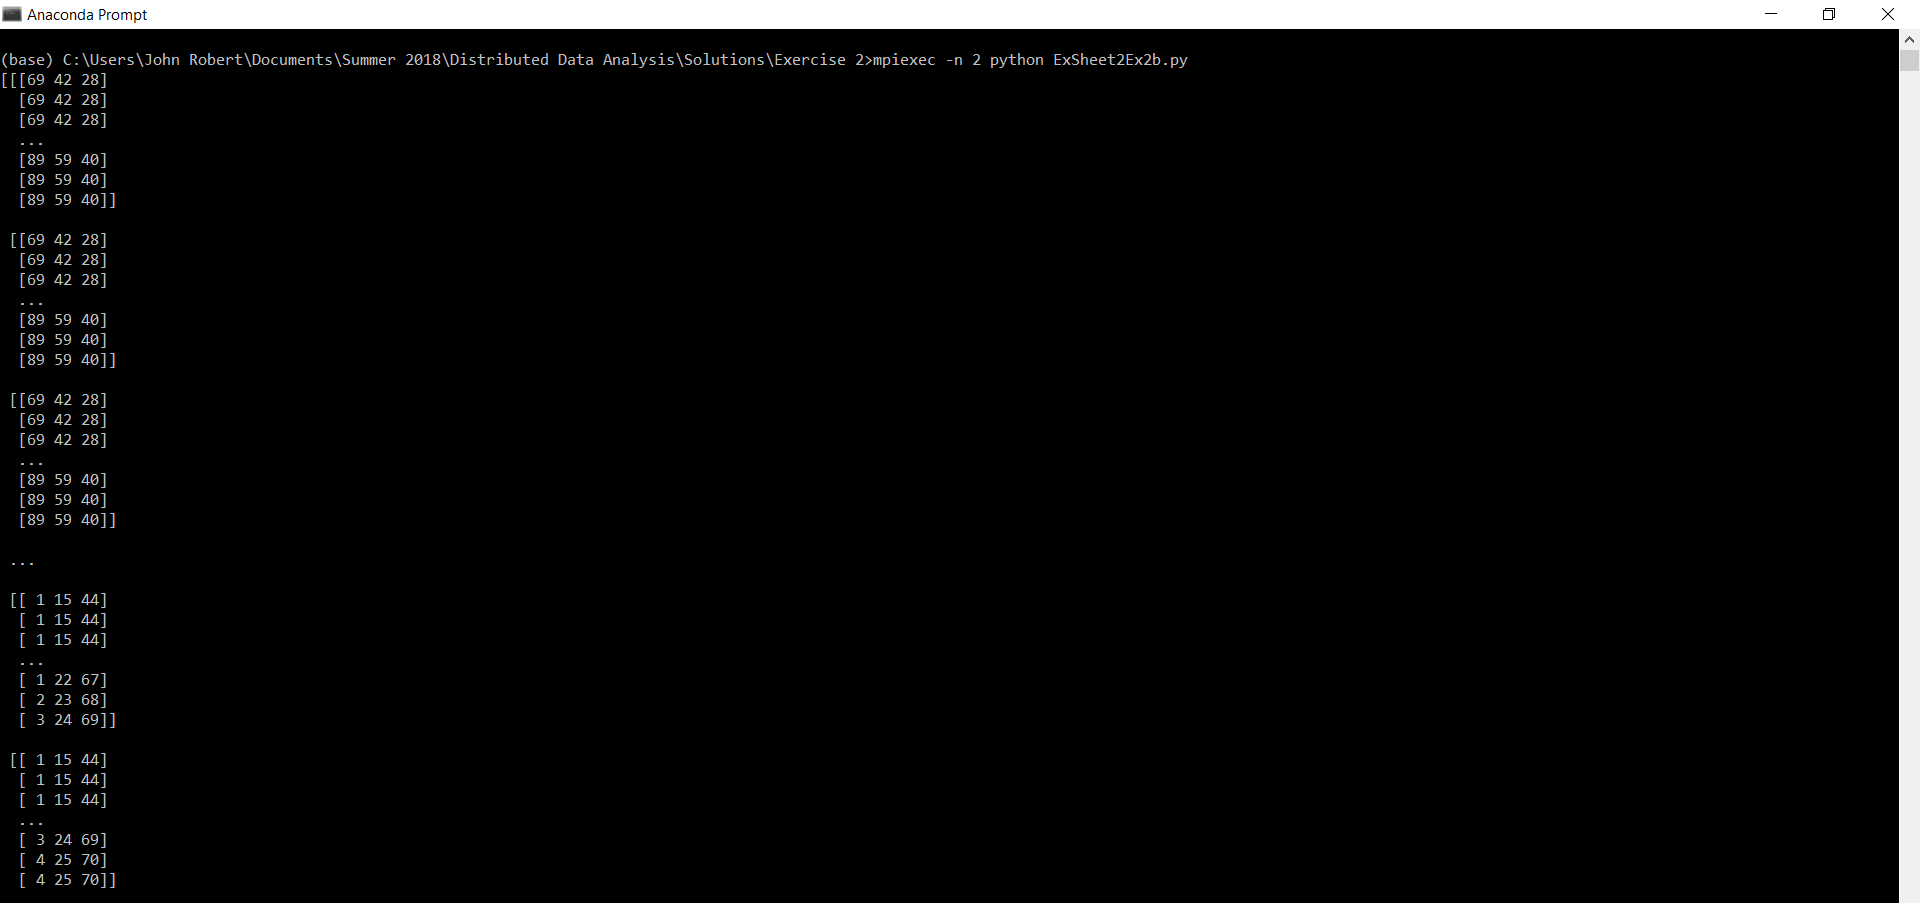

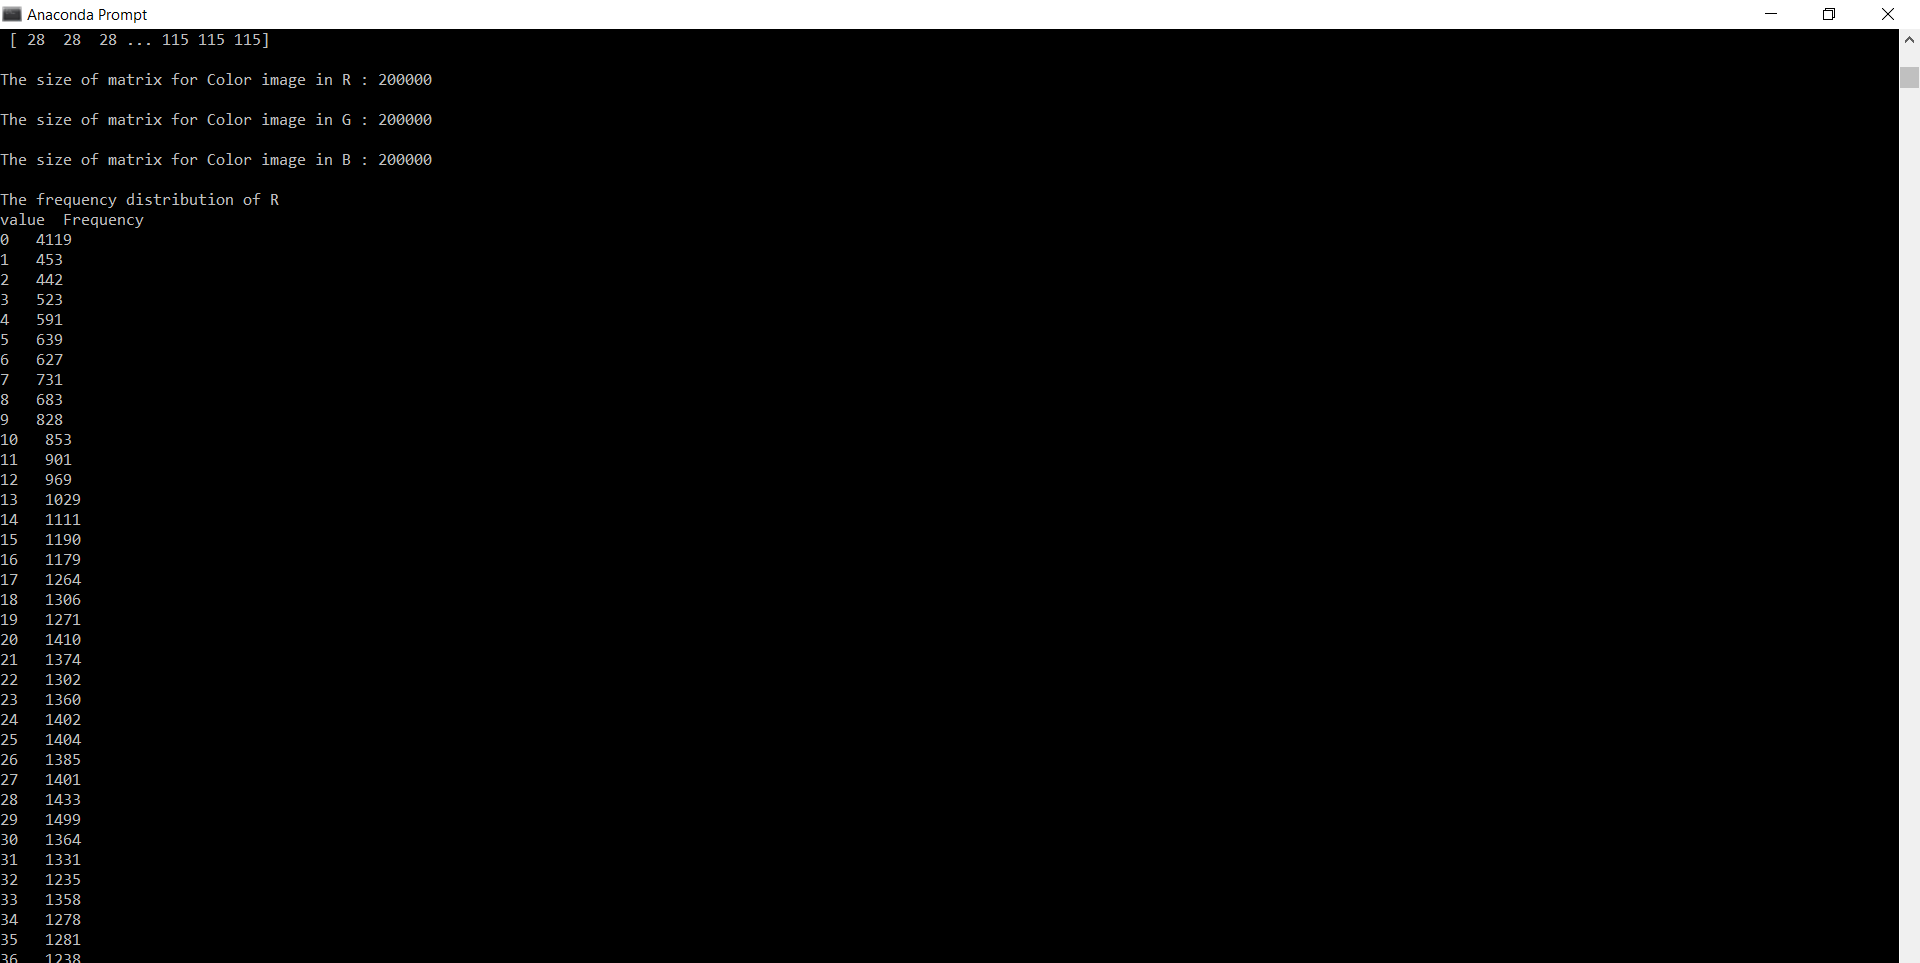

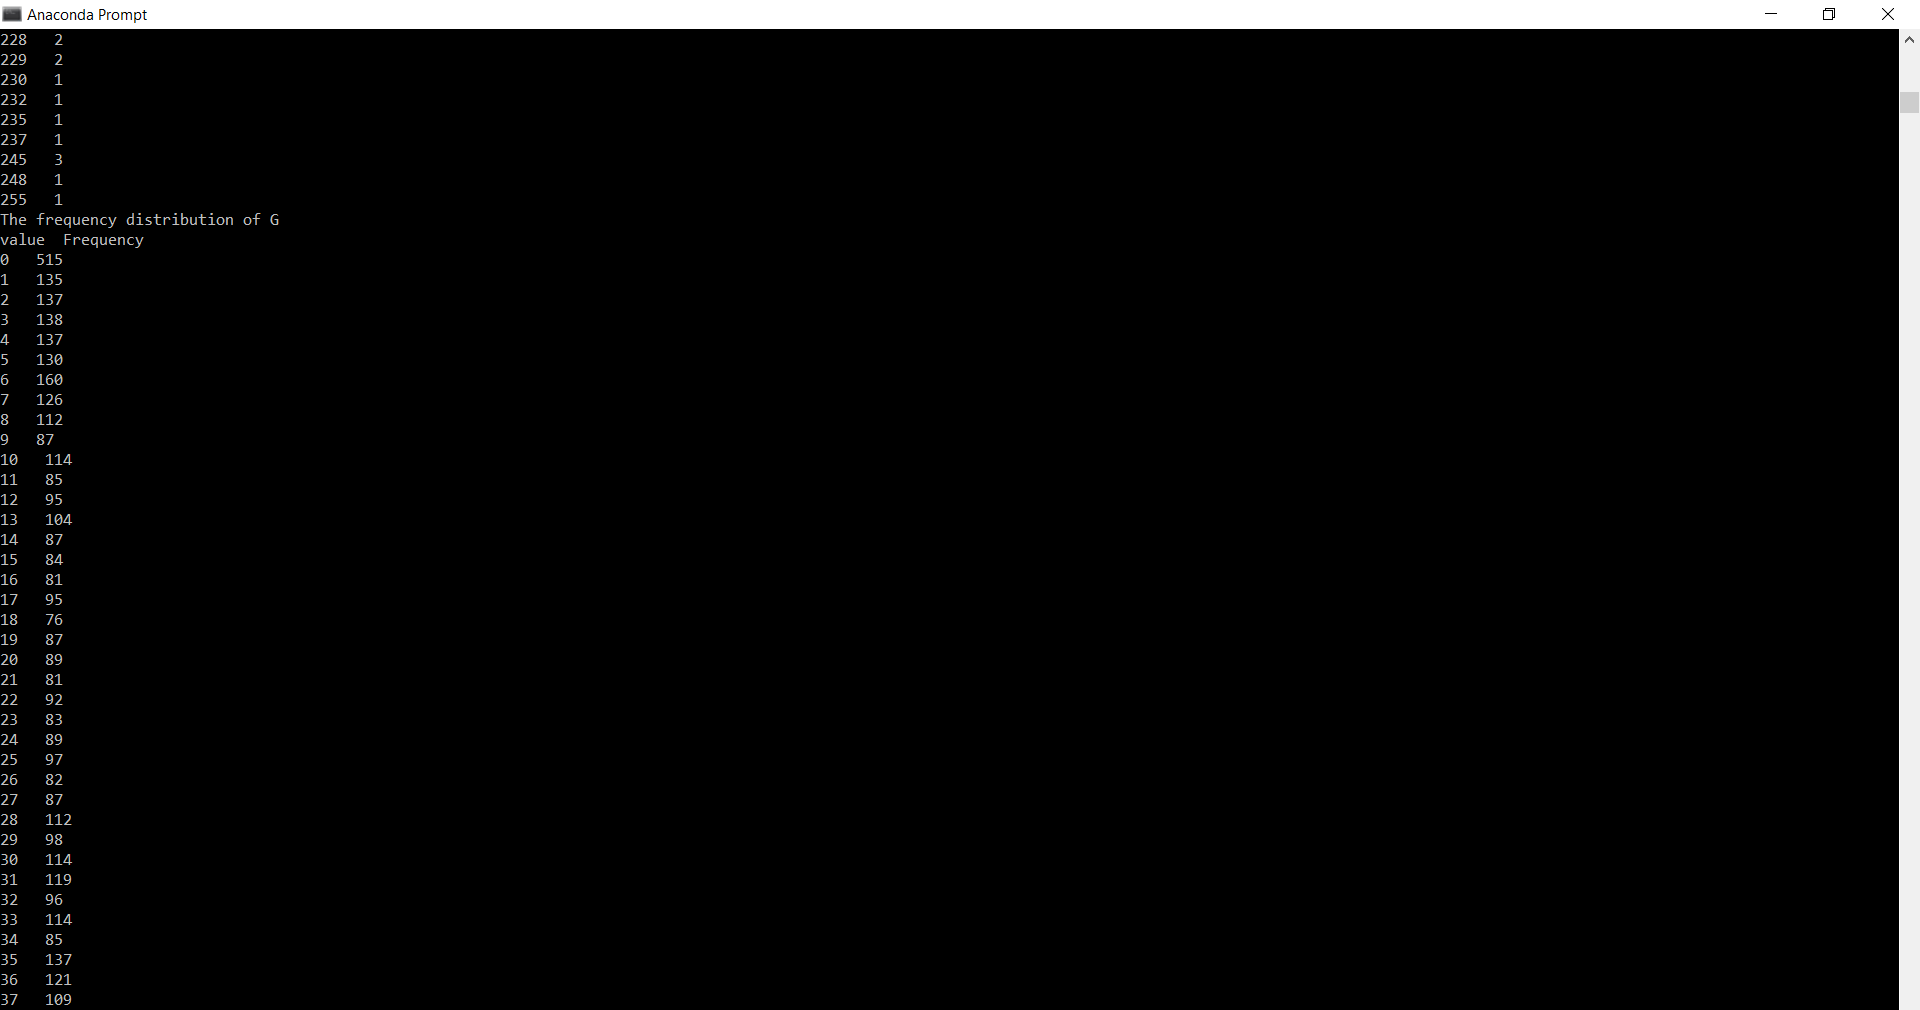

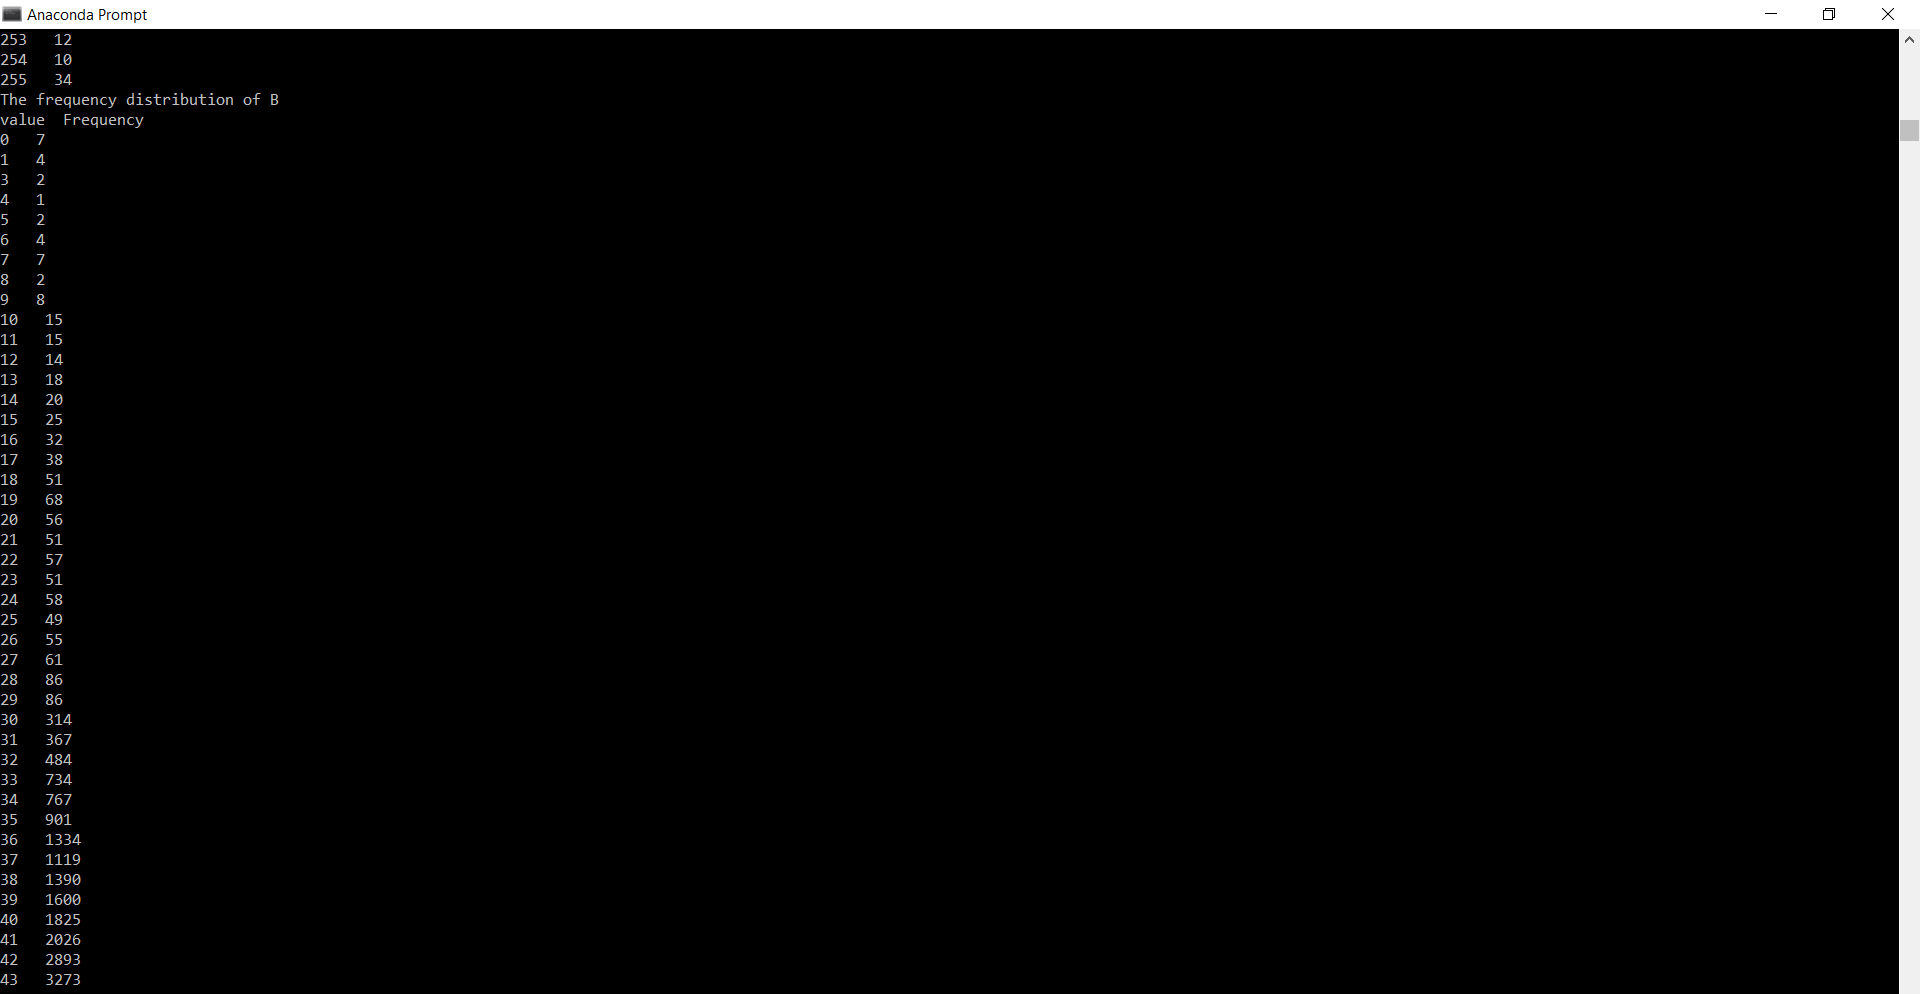

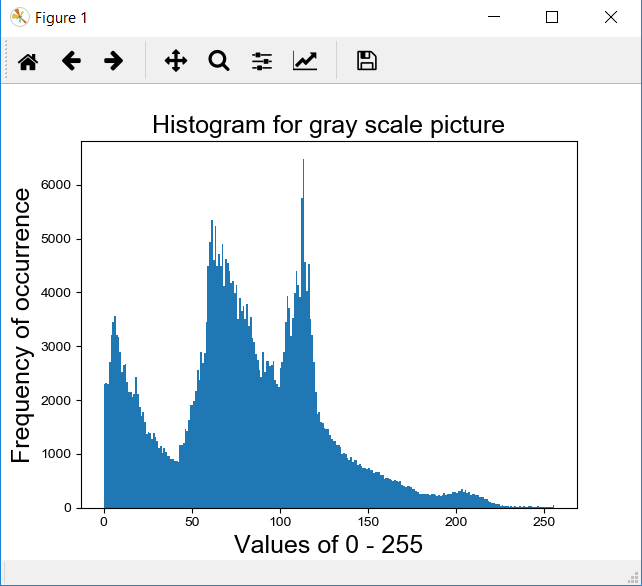

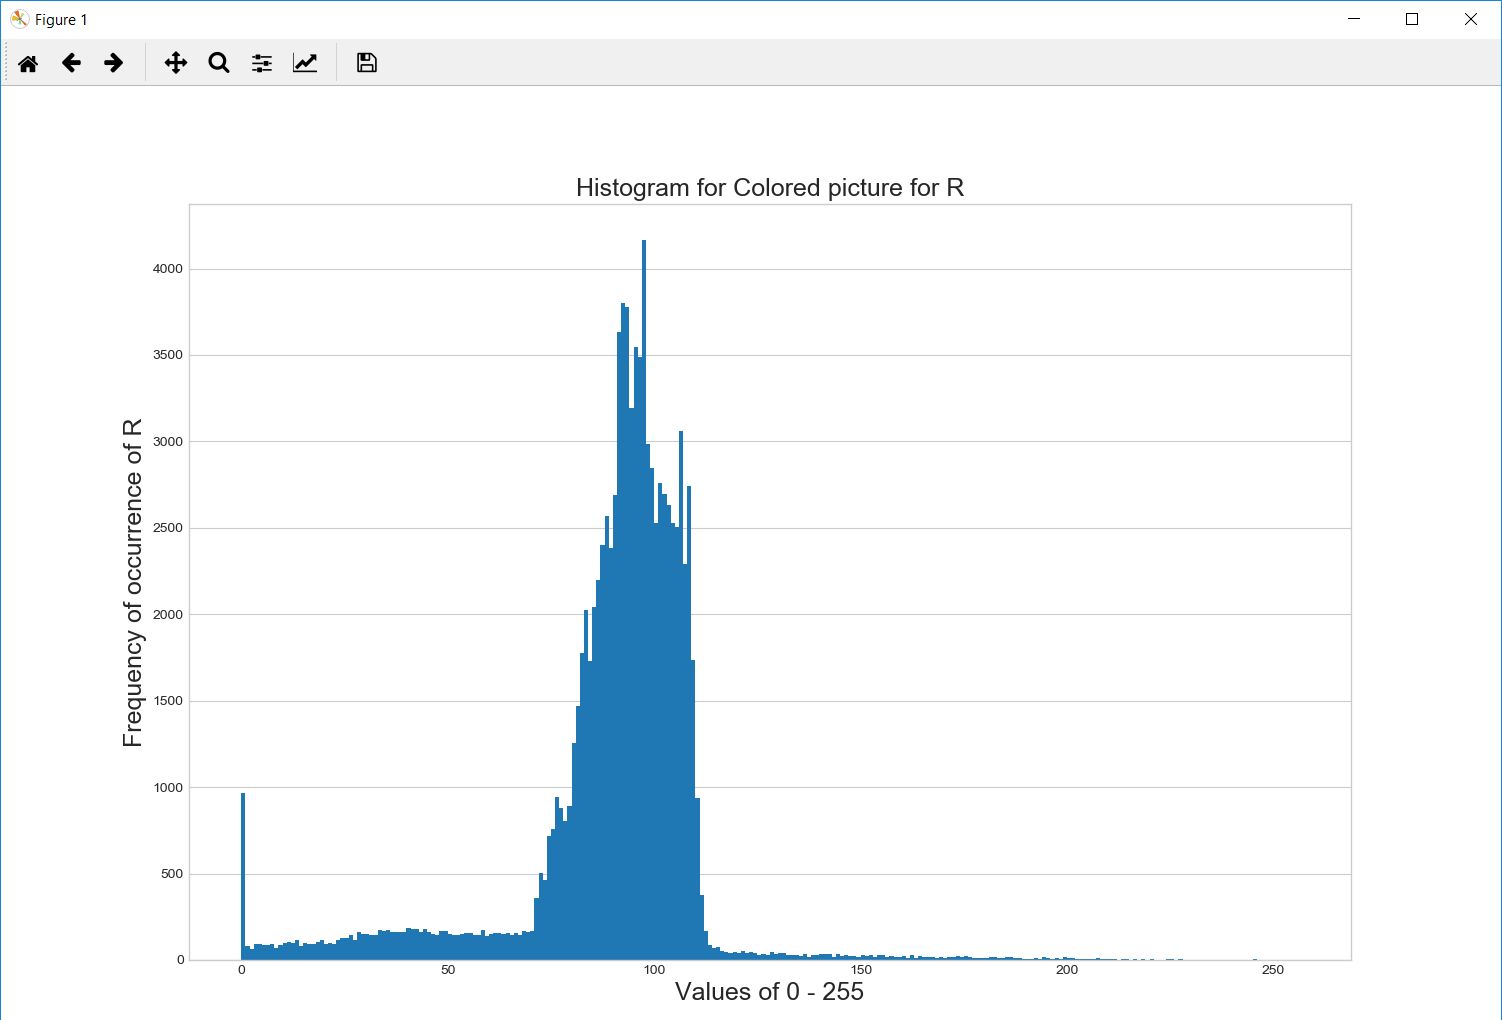

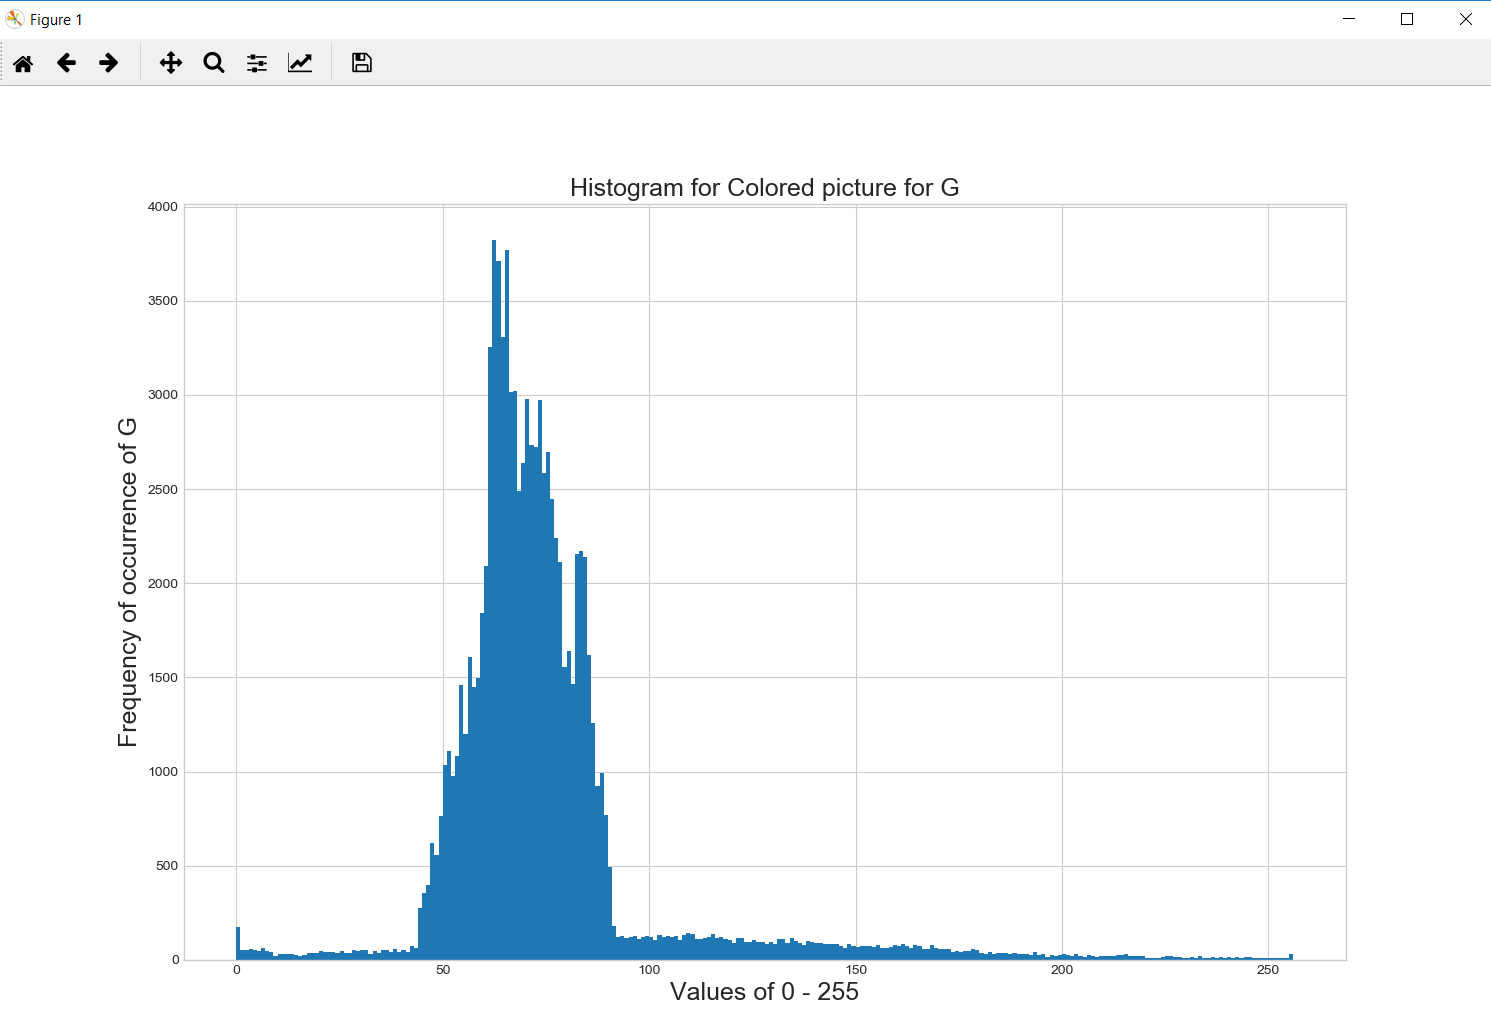

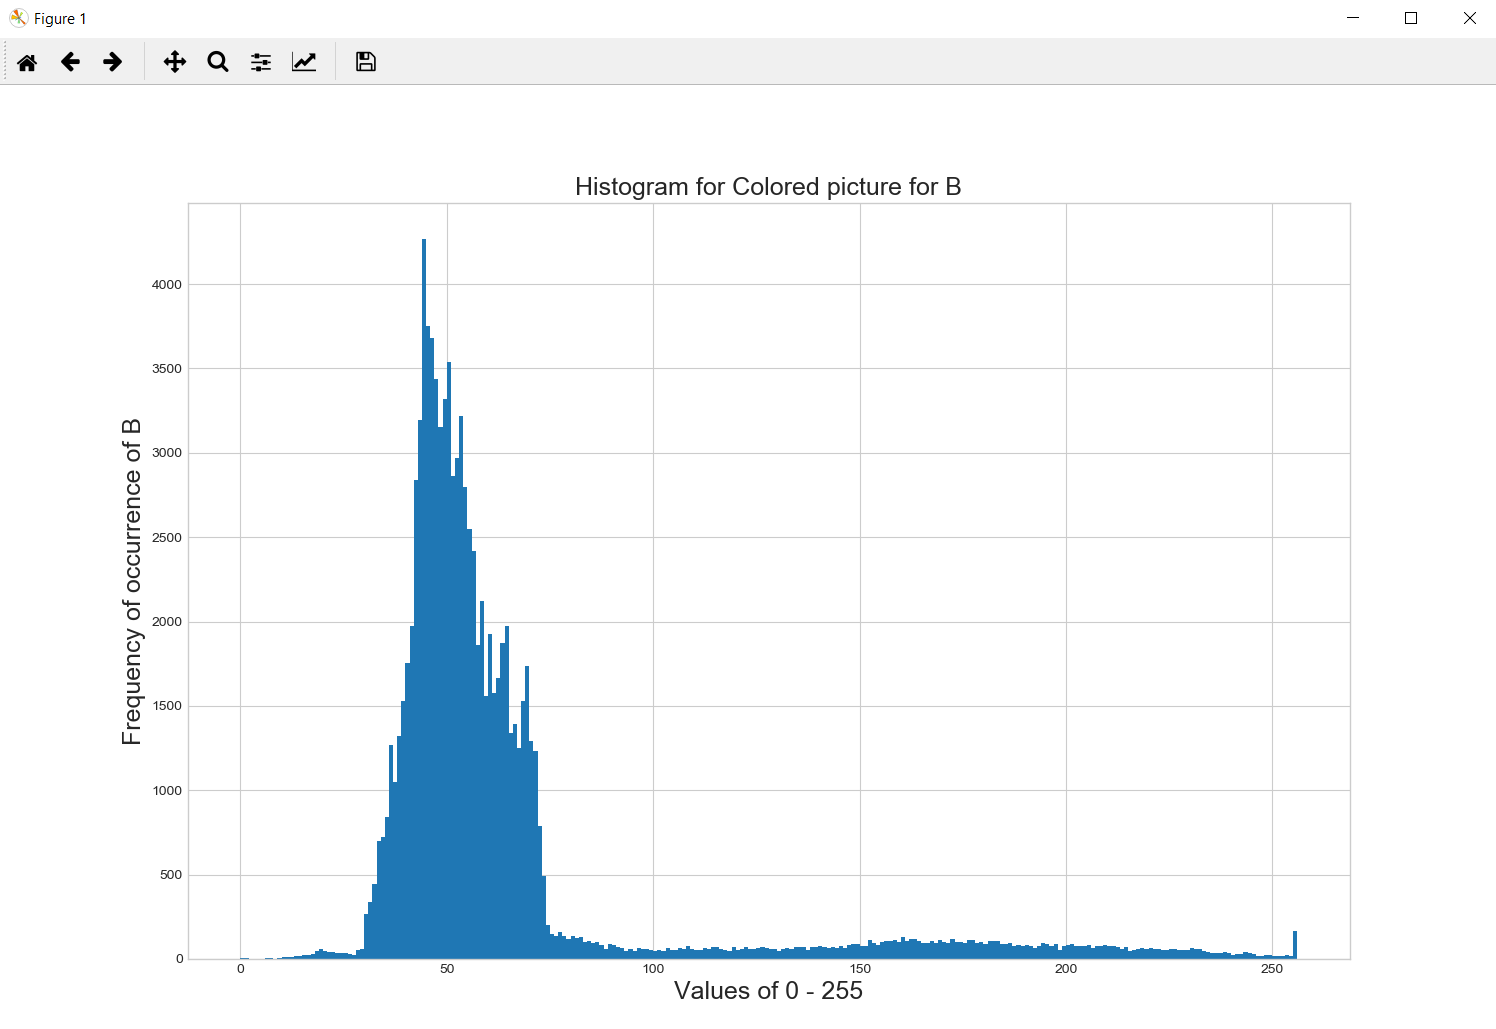

# Runtime analysis

| Number of Process          | GreyScale                                  | RGB                                  |
|----------------------------|--------------------------------------------|--------------------------------------|
| 1                          |          0.2664                            |   0.5872                             |
| 2                          |          0.2876                            |   0.6802                             |
| 3                          |          0.2917                            |   0.8376                             |
| 4                          |          0.3428                            |   0.9834                             |
|----------------------------|--------------------------------------------|--------------------------------------|


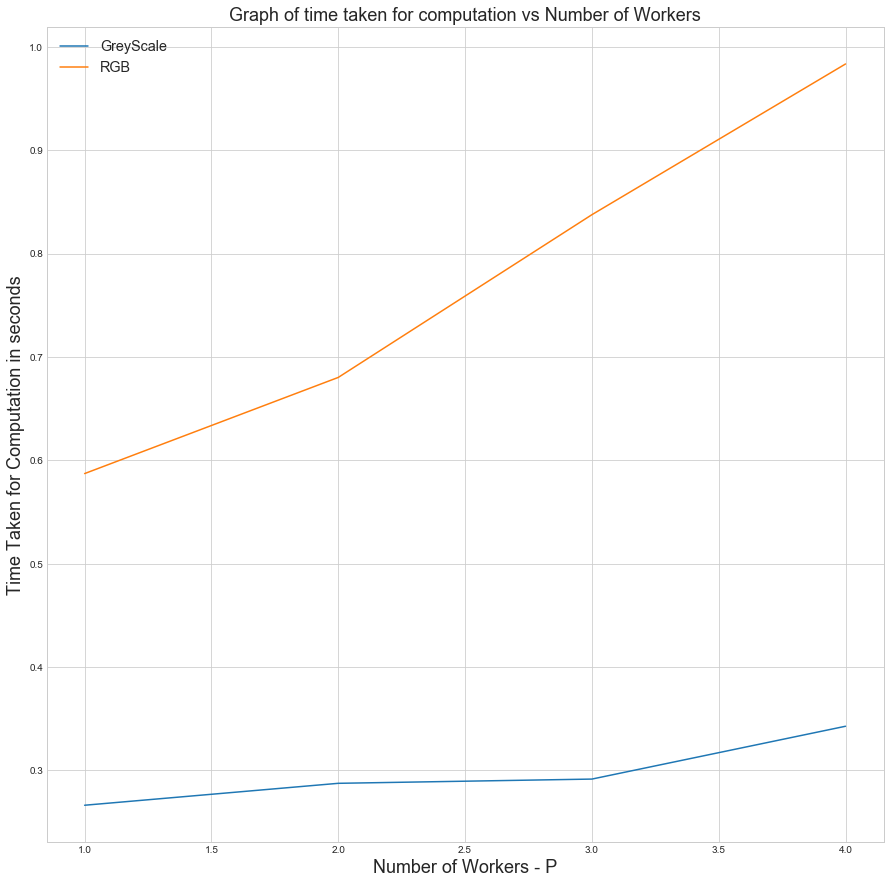

In [10]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (15,15)
sb.set_style ('whitegrid')

noWorkers  = [1,2,3,4]

GreyScale = [0.2664,0.2876,0.2917,0.3428]
RGB = [0.5872,0.6802,0.8376,0.9834]


plt.plot(noWorkers,GreyScale, label = "GreyScale" )
plt.plot(noWorkers,RGB, label = "RGB" )


plt.xlabel("Number of Workers - P", fontsize=18)
plt.ylabel("Time Taken for Computation in seconds", fontsize=18)
plt.yticks()
plt.title('Graph of time taken for computation vs Number of Workers', fontsize=18)
plt.legend(fontsize='x-large')

# Comment 

From the take we can see that the timetake in greyscale is lower than the time taken in RGB. This is because the processors have lot of commutation to do in RGB than in greyScale